### Import Necessary Libraries

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
import zipfile as zf
import os
import random
import cv2
import imutils



from skimage import feature

from tensorflow.keras.utils import to_categorical
from imutils import build_montages,paths


sns.set()

In [2]:
os.getcwd()

'C:\\Users\\91755'

### Load Train and Test data

In [3]:
spiral_train_healthy = os.listdir('C:\\IBM PROJECT\\Dataset\\spiral\\training\\healthy\\')
spiral_train_park = os.listdir('C:\\IBM PROJECT\\Dataset\\spiral\\training\\parkinson\\')

fp_spiral_train_healthy = 'C:\\IBM PROJECT\\Dataset\\spiral\\training\\healthy\\'
fp_spiral_train_park = 'C:\\IBM PROJECT\\Dataset\\spiral\\training\\parkinson\\'

spiral_test_healthy = os.listdir('C:\\IBM PROJECT\\Dataset\\spiral\\testing\\healthy\\')
spiral_test_park = os.listdir('C:\\IBM PROJECT\Dataset\\spiral\\testing\\parkinson\\')

fp_spiral_test_healthy = 'C:\\IBM PROJECT\\Dataset\\spiral\\testing\\healthy\\'
fp_spiral_test_park = 'C:\\IBM PROJECT\\Dataset\\spiral\\testing\\parkinson\\'

#### Function to quantify image

In [4]:
def quantify_image(image):
  features = feature.hog(image,orientations=9,
                pixels_per_cell=(10,10),cells_per_block=(2,2),transform_sqrt=True,block_norm="L1")

  return features

In [5]:
trainX = []
testX = []
outputs = []
trainY = []
testY = []

### Preprocessing

In [6]:
for i in spiral_train_healthy:
  image = cv2.imread(fp_spiral_train_healthy+i)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image =cv2.threshold(image, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  trainX.append(features)
  trainY.append('healthy')

for i in spiral_test_healthy:
  image = cv2.imread(fp_spiral_test_healthy+i)
  outputs.append(image)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  testX.append(features)
  testY.append('healthy')

In [7]:
for i in spiral_train_park:
  image = cv2.imread(fp_spiral_train_park+i)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  trainX.append(features)
  trainY.append('parkinson')

for i in spiral_test_park:
  image = cv2.imread(fp_spiral_test_park+i)
  outputs.append(image)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  testX.append(features)
  testY.append('parkinson')

In [8]:
trainX = np.array(trainX)
testX = np.array(testX)
trainY = np.array(trainY)
testY = np.array(testY)

In [9]:
print(trainX)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
print(testX)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
print(trainY)

['healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy'
 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy'
 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy'
 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy'
 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy'
 'healthy' 'parkinson' 'parkinson' 'parkinson' 'parkinson' 'parkinson'
 'parkinson' 'parkinson' 'parkinson' 'parkinson' 'parkinson' 'parkinson'
 'parkinson' 'parkinson' 'parkinson' 'parkinson' 'parkinson' 'parkinson'
 'parkinson' 'parkinson' 'parkinson' 'parkinson' 'parkinson' 'parkinson'
 'parkinson' 'parkinson' 'parkinson' 'parkinson' 'parkinson' 'parkinson'
 'parkinson' 'parkinson' 'parkinson' 'parkinson' 'parkinson' 'parkinson'
 'parkinson']


In [12]:
print(testY)

['healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy'
 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy'
 'healthy' 'parkinson' 'parkinson' 'parkinson' 'parkinson' 'parkinson'
 'parkinson' 'parkinson' 'parkinson' 'parkinson' 'parkinson' 'parkinson'
 'parkinson' 'parkinson' 'parkinson' 'parkinson']


In [13]:
le = LabelEncoder()

In [14]:
trainY = le.fit_transform(trainY)
testY = le.transform(testY)


In [15]:
print(trainY)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [16]:
print(testY)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Building the model using Random Forest Classifier

In [17]:
model = RandomForestClassifier(n_estimators=100)

### Fitting the model

In [18]:
model.fit(trainX,trainY)

RandomForestClassifier()

### Predictions

In [19]:
preds = model.predict(testX)
preds

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

### Confusion Matrix

In [20]:
cnf = confusion_matrix(testY,preds)
cnf

array([[14,  1],
       [ 2, 13]], dtype=int64)

### Heatmap

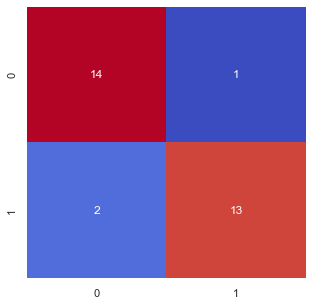

In [21]:
plt.figure(figsize=(5,5))
sns.heatmap(cnf , annot=True , cmap="coolwarm" , cbar=False)
plt.show()

In [22]:
### Calculating the Accuracy

In [23]:
acc = metrics.accuracy_score(testY,preds)
acc

0.9

In [24]:
indexes = np.random.randint(0,30,25)
indexes


array([13, 24, 21,  6, 18, 19,  4, 29, 25, 18, 13, 19, 21,  0, 27, 25, 12,
       13, 12, 15, 23,  8, 23, 20, 23])

In [25]:
labels = []

for i in indexes:
  pred = le.inverse_transform(preds)[i]
  labels.append(pred)

In [26]:
labels

['healthy',
 'parkinson',
 'parkinson',
 'healthy',
 'parkinson',
 'parkinson',
 'healthy',
 'parkinson',
 'parkinson',
 'parkinson',
 'healthy',
 'parkinson',
 'parkinson',
 'healthy',
 'parkinson',
 'parkinson',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'parkinson',
 'healthy',
 'parkinson',
 'parkinson',
 'parkinson']

In [27]:
results = []

for i in range(25):
  image = outputs[i]

  if labels[i] == 'healthy':
    color = (0,255,0)
  else:
    color = (0,0,255)

  text = str(labels[i])

  image = cv2.resize(image,(128,128))
  cv2.putText(image,text,(3,20),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)

  results.append(image)

### Prediction

(-0.5, 127.5, 127.5, -0.5)

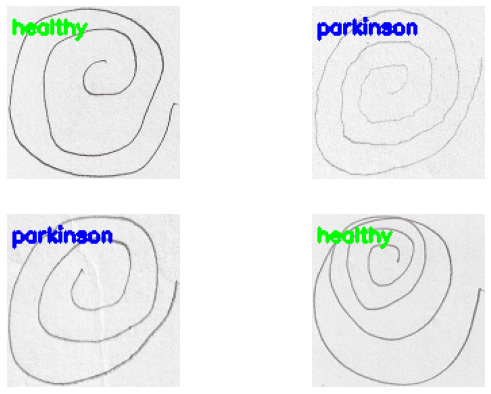

In [36]:

import cv2
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 7))

rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(results[0])
plt.axis('off')
fig.add_subplot(rows, columns, 2)
plt.imshow(results[1])
plt.axis('off')
fig.add_subplot(rows, columns, 3)
plt.imshow(results[2])
plt.axis('off')
fig.add_subplot(rows, columns, 4)
plt.imshow(results[3])
plt.axis('off')

